In [15]:
import json
import numpy as np
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
# Reading the ground truth labels

# df_true = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Side of the road annotations/Sides_of_the_road_compare.geojson", crs='EPSG:25833')
df_true_RGN = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Special cases/RGN/Ground_truth.geojson", crs='EPSG:25833')
df_true_Sides = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Special cases/Sides of the road/Ground_truth.geojson", crs='EPSG:25833')

# Reading the predicted labels

# df_predicted = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Side of the road annotations/Predictions_cropped.geojson", crs='EPSG:25833')
df_predicted_RGN = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Special cases/RGN//Predictions_true.geojson", crs='EPSG:25833')
df_predicted_Sides = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Special cases/Sides of the road/Predictions.geojson", crs='EPSG:25833')

In [17]:
# Adding a 0.5m buffer to both dataframes

df_true_RGN.geometry = df_true_RGN.geometry.buffer(0.5)
df_true_Sides.geometry = df_true_Sides.geometry.buffer(0.5)
df_predicted_RGN.geometry = df_predicted_RGN.geometry.buffer(0.5)
df_predicted_Sides.geometry = df_predicted_Sides.geometry.buffer(0.5)

In [18]:
# Dissolving geometries to avoid overlap areas
df_true_RGN_diss = df_true_RGN.dissolve()
df_true_Sides_diss = df_true_Sides.dissolve()
df_predicted_RGN_diss = df_predicted_RGN.dissolve()
df_predicted_Sides_diss = df_predicted_Sides.dissolve()


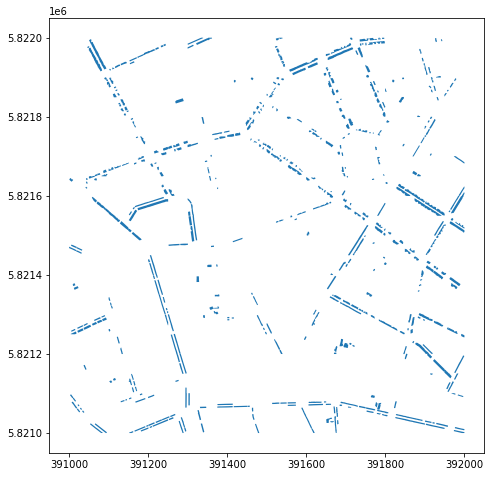

In [19]:
df_true_RGN_diss.plot(figsize=(8,8))

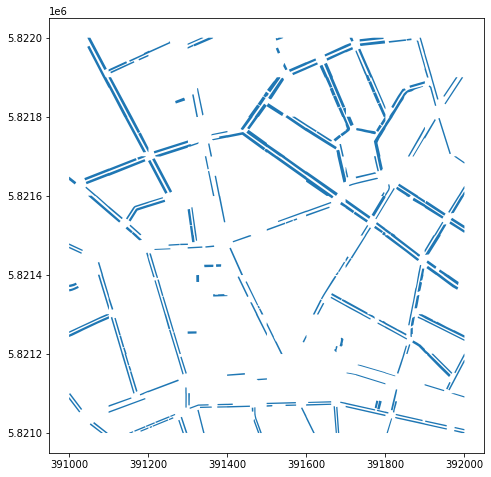

In [20]:
df_true_Sides_diss.plot(figsize=(8,8))

In [21]:
# Merging the ground truth and predicted
df_ground_truth= df_true_RGN_diss.union(df_true_Sides_diss)
df_predict= df_predicted_RGN_diss.union(df_predicted_Sides_diss)

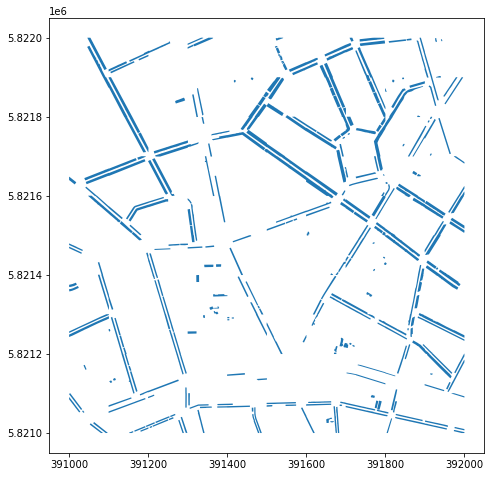

In [22]:
df_ground_truth.plot(figsize=(8,8))

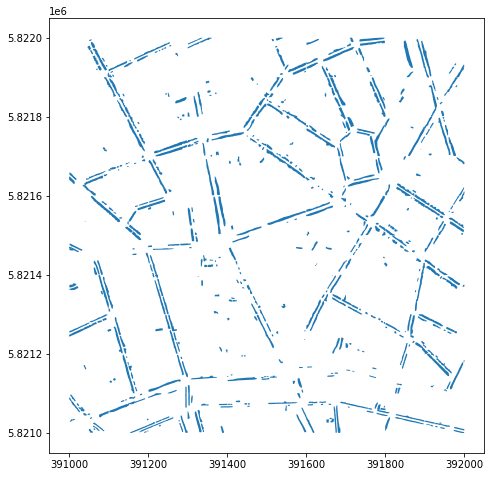

In [23]:
df_predict.plot(figsize=(8,8))

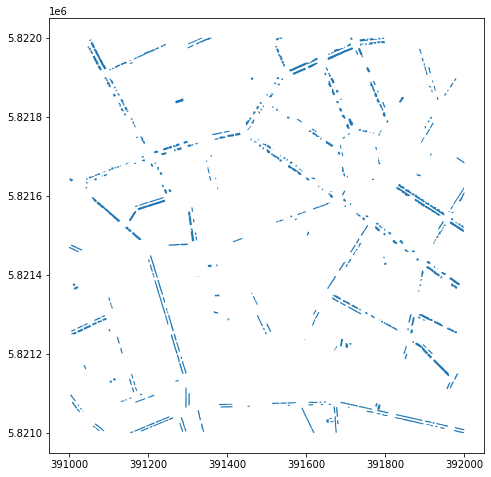

In [24]:
intersection.plot(figsize=(8,8))

In [25]:
intersection = df_ground_truth.intersection(df_predict, align=True)

In [26]:
intersection.area/df_predict.area

0    0.709657
dtype: float64

For with trees: 0.306356 \
For without trees:  0.49294\
** For RGN: 0.6391\
** For RGL: 0.694349\
** For RGN with flase positive removed: 0.672901\
For Sides of the road: 0.70863\
Sides of the road + RGN: 0.709657


